In [9]:
import glob
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy
import random

subset = "training"

num_imgs = 20

save_imgs_dir = f"../retinalSynthesisDataset/{subset}/Images/"

save_masks_dir = f"../retinalSynthesisDataset/{subset}/Annotations/"


all_background_imgs = glob.glob("Backgrounds/*.png")

all_tool_ids = os.listdir("tools/Images/")


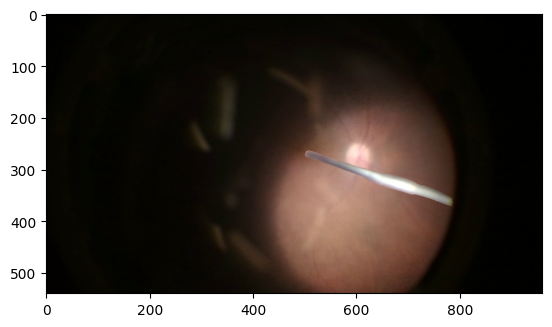

In [11]:
# no change position:
count = 0
for background_dir in all_background_imgs:
    for tool_id in all_tool_ids:
        
        # read image:
        img_dir = f"tools/Images/{tool_id}"
        img = Image.open(img_dir).convert("RGB")
        img = np.array(img, dtype=np.uint8)

        # read mask:
        mask_dir = f"tools/Annotations/{tool_id}"

        mask = Image.open(mask_dir).convert("L")
        mask = np.array(mask, dtype=np.uint8)

        # read backgroud:
        backgroud = Image.open(background_dir).convert("RGB")
        backgroud = np.array(backgroud, dtype=np.uint8)

        # create a map to obtain a RGB image with tool only:
        tool_map = np.dstack([mask, mask, mask])
        vacant_map = -(tool_map - 1)

        # overlay
        overlay = vacant_map * backgroud + img * tool_map 
        plt.imshow(overlay)

        # save image:
        im = Image.fromarray(overlay).convert("RGB")
        im.save(f"{save_imgs_dir}frame_{str(count).zfill(4)}.png")

        im = Image.fromarray(mask*7).convert("L")
        im.save(f"{save_masks_dir}frame_{str(count).zfill(4)}.png")

        count += 1


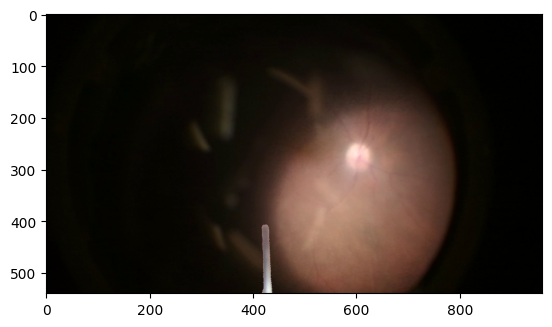

In [12]:
for i in range(num_imgs):
    # translation + rotate:
    down = random.randint(-150, 150) # move downward
    right= random.randint(-100, 100) # move to the right
    degree = random.randint(-90, 90)

    # read image:
    img = Image.open(img_dir).convert("RGB")
    img = np.array(img, dtype=np.uint8)

    # read mask:
    mask = Image.open(mask_dir).convert("L")
    mask = np.array(mask, dtype=np.uint8)

    # read backgroud:
    backgroud = Image.open(background_dir).convert("RGB")
    backgroud = np.array(backgroud, dtype=np.uint8)

    # move img:
    shift = [down, right, 0]
    move_img = scipy.ndimage.shift(img, shift)
    move_img = np.array(move_img, dtype=np.uint8)

    # move mask:
    move_mask = scipy.ndimage.shift(mask, shift[:2])
    move_mask = np.array(move_mask, dtype=np.uint8)

    # rotate img:
    move_img = scipy.ndimage.rotate(move_img, degree, reshape=False)
    move_img = np.array(move_img, dtype=np.uint8)

    # rotate mask:
    move_mask = scipy.ndimage.rotate(move_mask, degree, reshape=False)
    move_mask = np.array(move_mask, dtype=np.uint8)

    # create a map to obtain a RGB image with tool only:
    tool_map = np.dstack([move_mask, move_mask, move_mask])
    vacant_map = -(tool_map - 1)

    # overlay
    overlay = vacant_map * backgroud + move_img * tool_map 
    plt.imshow(overlay)

    # save image:
    if right < 0:
        right = f"m{abs(right)}"

    if down < 0:
        down = f"m{abs(down)}"

    if degree < 0:
        degree = f"m{abs(degree)}"

    im = Image.fromarray(overlay).convert("RGB")
    im.save(f"{save_imgs_dir}frame_{str(count).zfill(4)}.png")

    im = Image.fromarray(move_mask*7).convert("L")
    im.save(f"{save_masks_dir}frame_{str(count).zfill(4)}.png")

    count += 1
